In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_1.csv")

In [ ]:
print(df_0.head())

In [3]:
# Define the target variable and numeric columns
target = 'dgp_name'
numeric_cols_df_0 = df_0.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_0 = df_0.select_dtypes(exclude=[np.number]).columns.tolist()

In [4]:
# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_0 = [col for col in numeric_cols_df_0 if col not in string_cols_df_0]

In [5]:
# Train a RandomForest model to get feature importances
X = df_0[numeric_cols_df_0]
y = df_0[target]

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the target variable
y_encoded = le.fit_transform(y)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

In [8]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

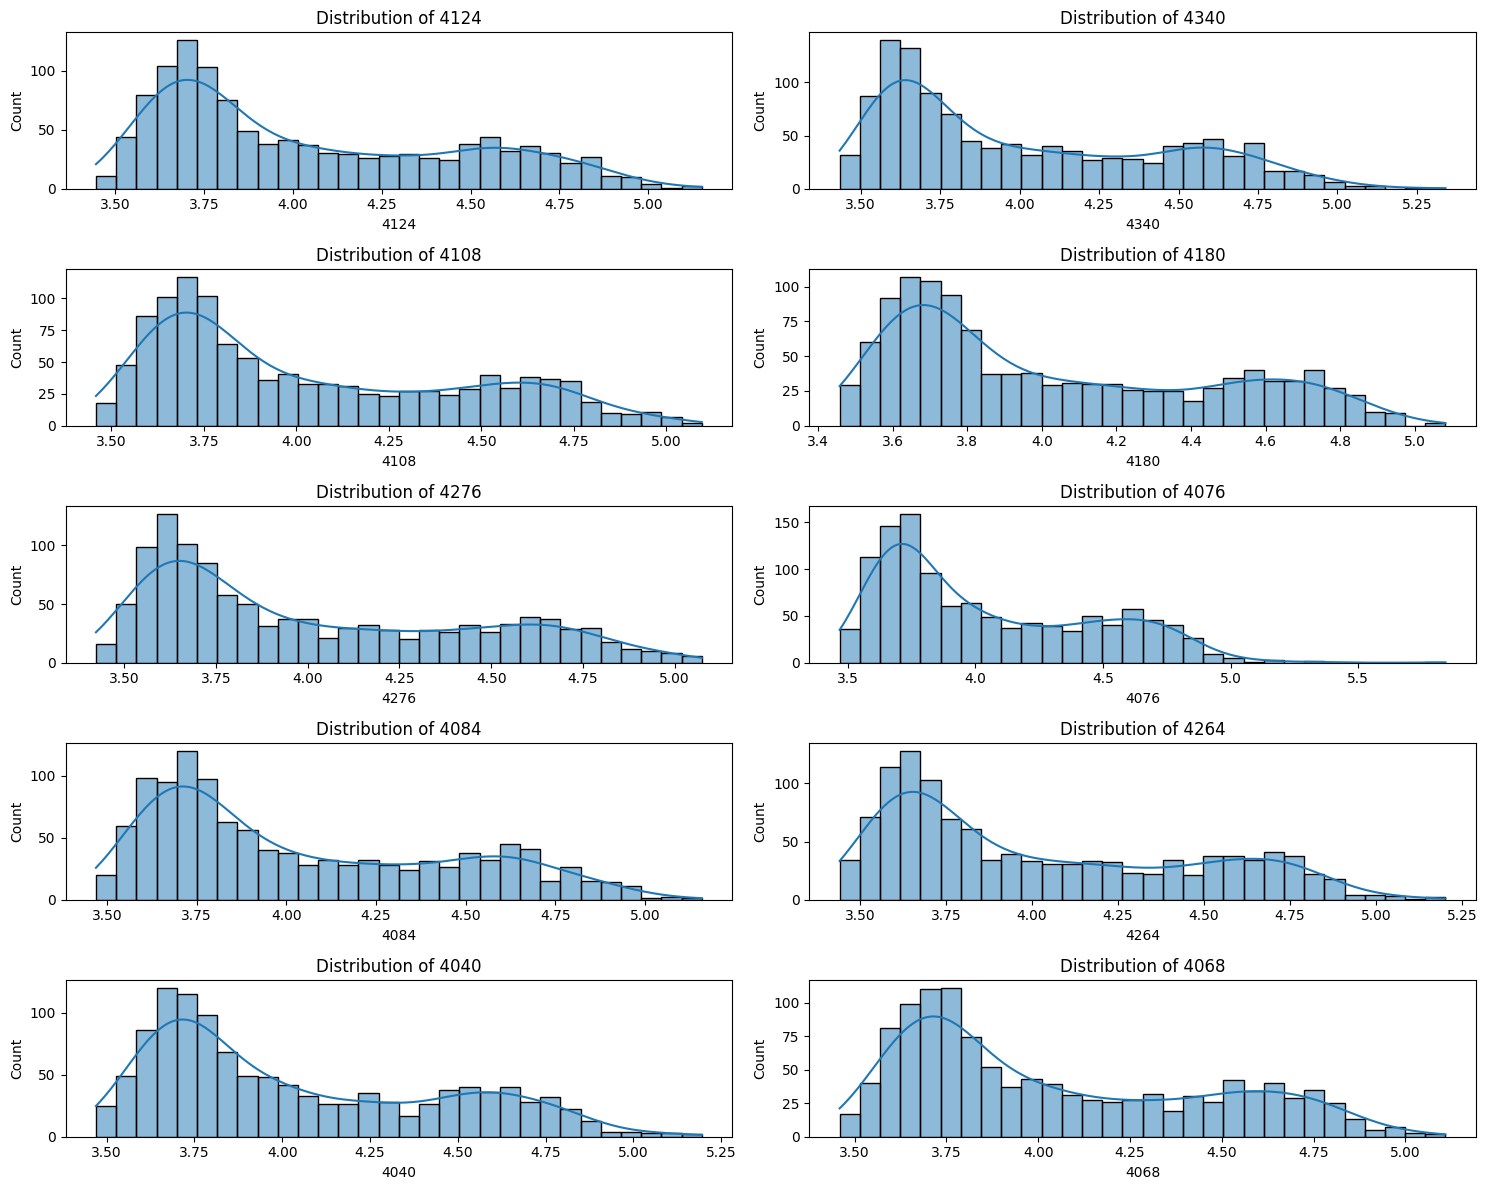

In [9]:
# Plot the distribution of the top 10 most important features
plt.figure(figsize=(15, 12))
for i, idx in enumerate(indices):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df_0[numeric_cols_df_0[idx]], bins=30, kde=True)
    plt.title(f'Distribution of {numeric_cols_df_0[idx]}')
plt.tight_layout()
plt.show()

In [10]:
from scipy import stats

# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from the top 10 important features
top_features = [numeric_cols_df_0[idx] for idx in indices]
df_0_cleaned = remove_outliers_zscore(df_0, top_features)

# Check the shape of the cleaned dataframe
print("Original Data Shape:", df_0.shape)
print("Cleaned Data Shape:", df_0_cleaned.shape)


Original Data Shape: (1156, 1907)
Cleaned Data Shape: (1152, 1907)


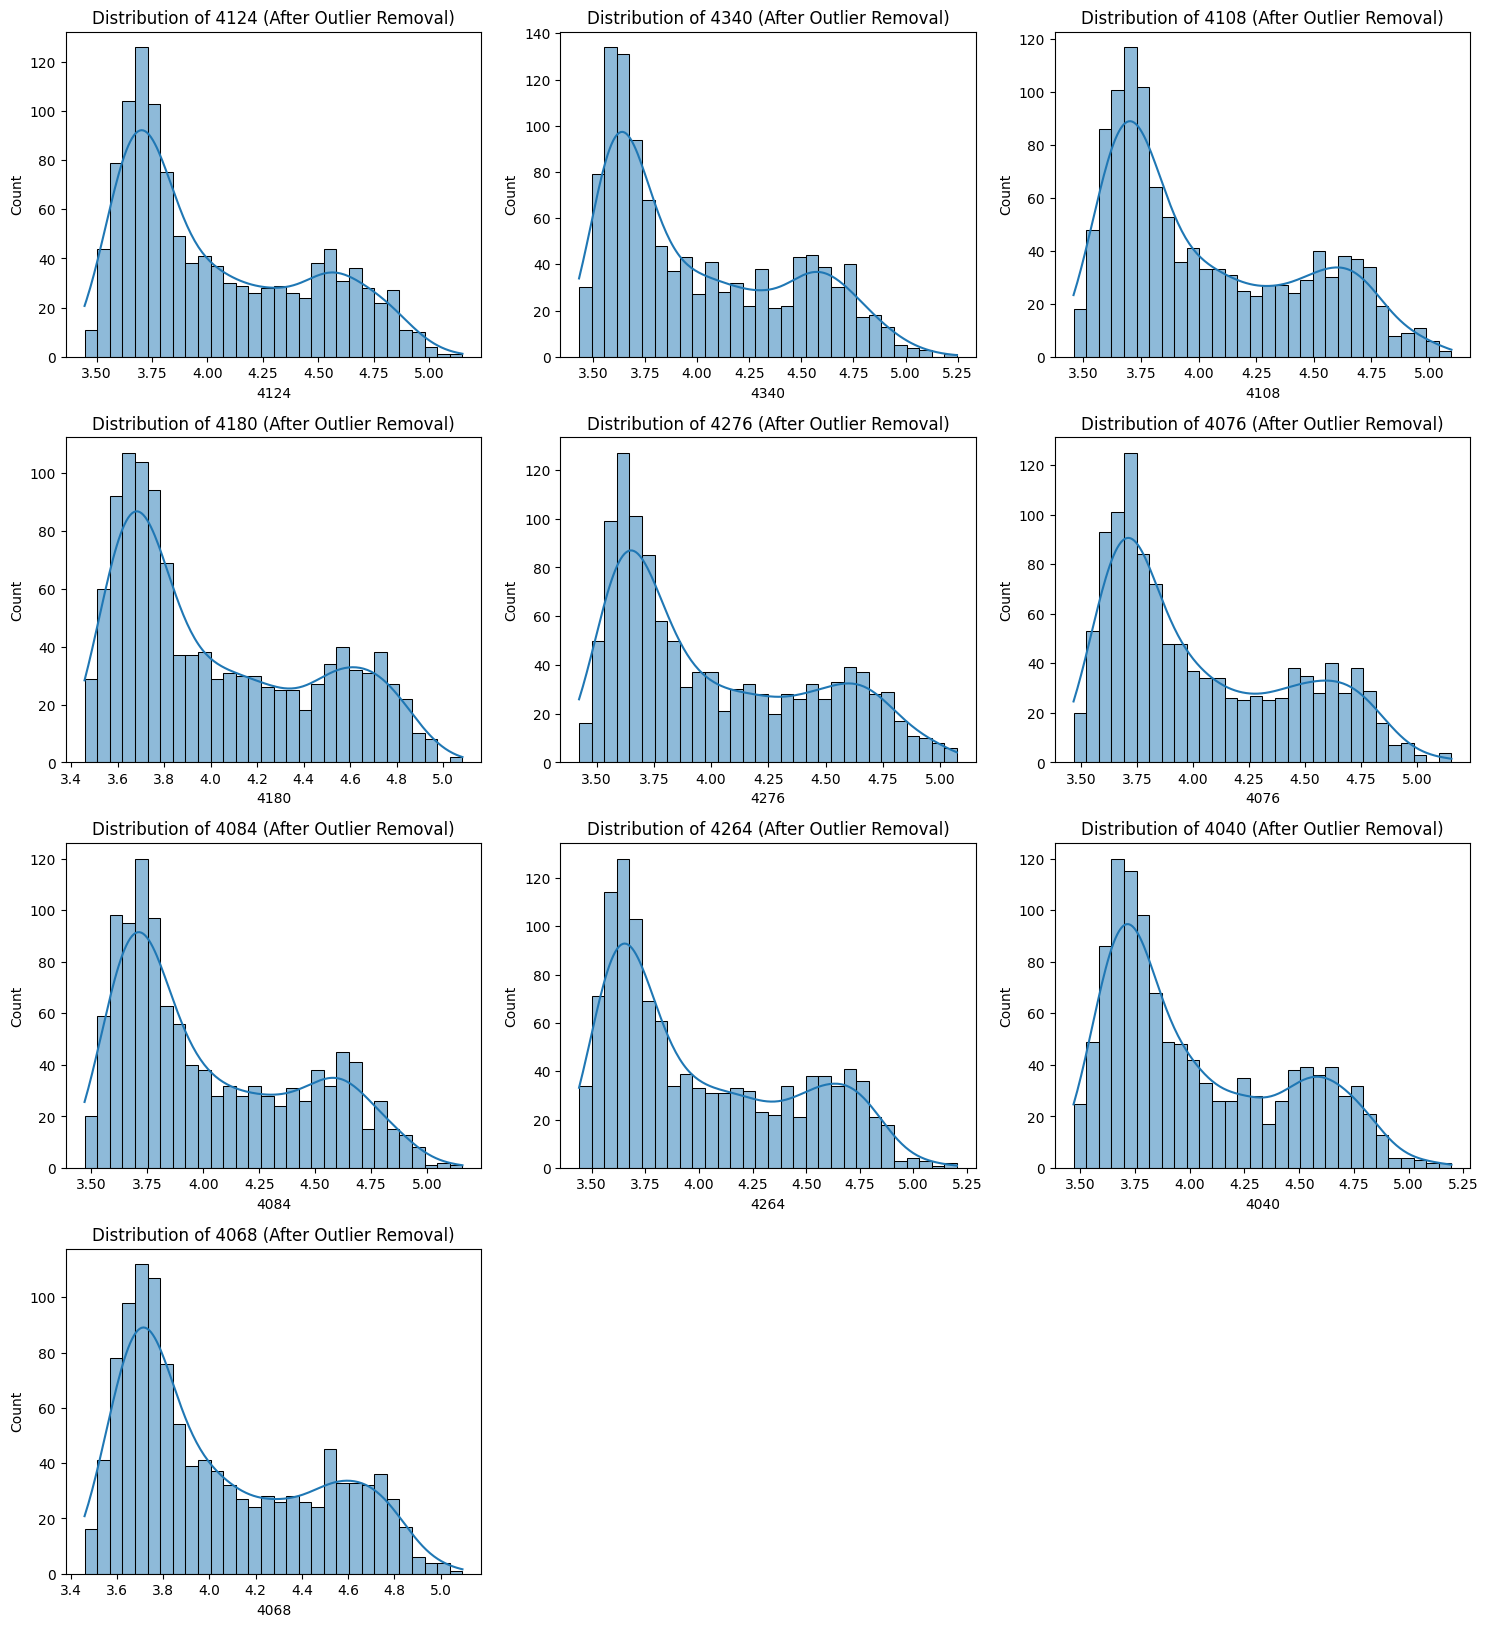

In [11]:
# Plot the distribution of the top 15 most important features after outlier removal
plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df_0_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (After Outlier Removal)')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the cleaned data into train and test sets
X_cleaned = df_0_cleaned[numeric_cols_df_0]
y_cleaned = df_0_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.5, random_state=42)

# Train the RandomForest model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Analyze accuracy per 'prov_char'
df_0_test_cleaned = df_0_cleaned.loc[X_test.index]
df_0_test_cleaned['predicted'] = y_pred
df_0_test_cleaned['actual'] = y_test.values

prov_char_analysis = df_0_test_cleaned.groupby('prov_char').apply(lambda x: (x['actual'] == x['predicted']).mean())
print(prov_char_analysis)


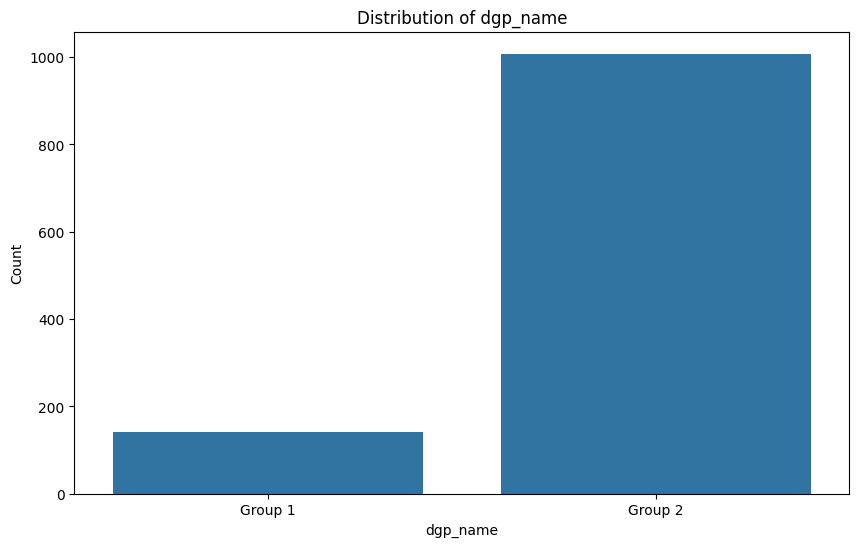

In [13]:
# Create a distribution plot for 'dgp_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_0_cleaned, x=target)
plt.title('Distribution of dgp_name')
plt.xlabel('dgp_name')
plt.ylabel('Count')
plt.show()

In [14]:
# Verify the new distribution
print("New distribution of dgp_name:")
print(df_0_cleaned[target].value_counts())

New distribution of dgp_name:
dgp_name
Group 2    1008
Group 1     141
Name: count, dtype: int64


In [15]:
# Separate Thai and Non-Thai samples
df_0_cleaned_thai = df_0_cleaned[df_0[target] == 'Group 2']
df_0_cleaned_non_thai = df_0_cleaned[df_0[target] == 'Group 1']

C:\Users\pingk\AppData\Local\Temp\ipykernel_27120\458920237.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_0_cleaned_thai = df_0_cleaned[df_0[target] == 'Group 2']
C:\Users\pingk\AppData\Local\Temp\ipykernel_27120\458920237.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_0_cleaned_non_thai = df_0_cleaned[df_0[target] == 'Group 1']


In [16]:
from sklearn.ensemble import IsolationForest

# Identify and remove outliers in Thai samples using Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(df_0_cleaned_thai[numeric_cols_df_0])
mask = yhat != -1
df_0_cleaned_thai_cleaned = df_0_cleaned_thai[mask]

In [17]:
# Combine the cleaned Thai samples with Non-Thai samples

df_1_cleaned = pd.concat([df_0_cleaned_thai_cleaned, df_0_cleaned_non_thai], axis=0).reset_index(drop=True)

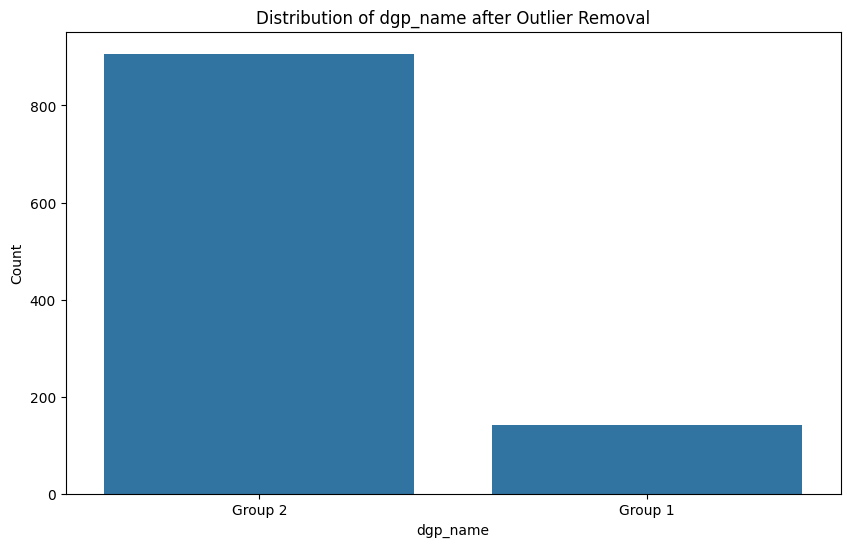

In [18]:
# Plot the distribution of dgp_name after outlier removal
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1_cleaned, x=target)
plt.title('Distribution of dgp_name after Outlier Removal')
plt.xlabel('dgp_name')
plt.ylabel('Count')
plt.show()


In [19]:
# Verify the new distribution
print("New distribution of dgp_name:")
print(df_1_cleaned[target].value_counts())

New distribution of dgp_name:
dgp_name
Group 2    907
Group 1    141
Name: count, dtype: int64


In [ ]:
#df_1_cleaned.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fullfledgert4rt6_1.csv", index=False)

In [20]:
df_2 = df_1_cleaned.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'dgp_name' column
le = LabelEncoder()
df_2['dgp_name_encoded'] = le.fit_transform(df_2['dgp_name'])

In [22]:
# Define the target variable and numeric columns
numeric_cols_df_2 = df_2.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_2 = df_2.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_2 = [col for col in numeric_cols_df_2 if col not in string_cols_df_2]

In [23]:
# Train a RandomForest model to get feature importances
X_df_2 = df_2[numeric_cols_df_2].drop(columns=['dgp_name_encoded'])
y_df_2 = df_2['dgp_name_encoded'].values

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Initial model training to find consistent samples
rf = RandomForestClassifier(random_state=42)
rf.fit(X_df_2, y_df_2)

# Get predictions
df_2['predictions'] = rf.predict(X_df_2)

# Keep samples that are correctly classified
consistent_samples = df_2[df_2['dgp_name_encoded'] == df_2['predictions']]

# Separate features and target again with consistent samples
X_df_2_consistent = consistent_samples.drop(columns=['dgp_name', 'dgp_name_encoded', 'predictions'])
y_df_2_consistent = consistent_samples['dgp_name_encoded'].values

# Ensure X_df_2_consistent contains only numeric columns
X_df_2_consistent = X_df_2_consistent.select_dtypes(include=[np.number])

# Map for original string labels to numeric encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Step 8: Apply undersampling to achieve a balanced dataset
rus = RandomUnderSampler(sampling_strategy={label_mapping['Group 2']: 141, label_mapping['Group 1']: 141}, random_state=42)
X_df_2_balanced, y_df_2_balanced = rus.fit_resample(X_df_2_consistent, y_df_2_consistent)

# Step 9: Display the new distribution of 'dgp_name'
balanced_df = consistent_samples.iloc[rus.sample_indices_]
dgp_name_distribution = balanced_df['dgp_name'].value_counts()
print(dgp_name_distribution)


dgp_name
Group 1    141
Group 2    141
Name: count, dtype: int64


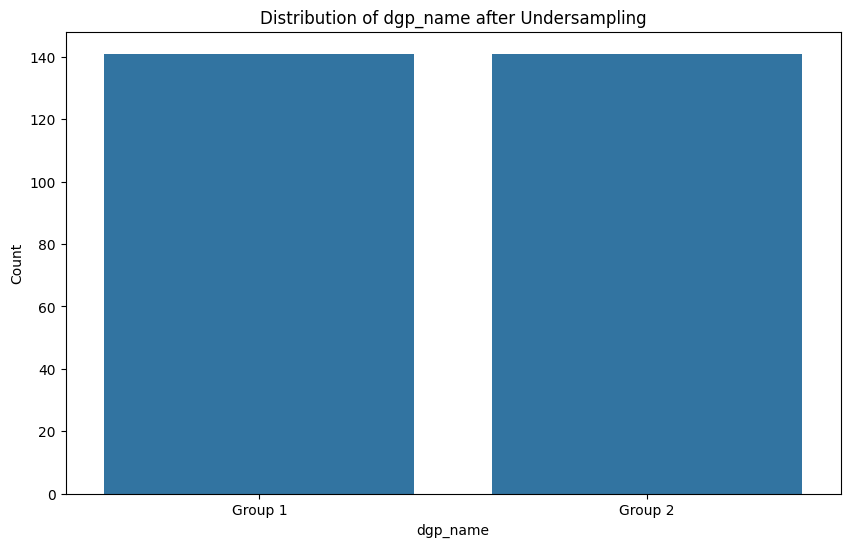

In [25]:
# Check the distribution of 'dgp_name' after undersampling

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'dgp_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='dgp_name')
plt.title('Distribution of dgp_name after Undersampling')
plt.xlabel('dgp_name')
plt.ylabel('Count')
plt.show()


Mean Accuracy: 0.5432652505446622
Left out group: ['BBX'], Accuracy: 0.7777777777777778
Left out group: ['CBI'], Accuracy: 0.4444444444444444
Left out group: ['CCO'], Accuracy: 0.3888888888888889
Left out group: ['CPN'], Accuracy: 0.6470588235294118
Left out group: ['KAX'], Accuracy: 1.0
Left out group: ['KBI'], Accuracy: 0.75
Left out group: ['KBX'], Accuracy: 0.5882352941176471
Left out group: ['KTX'], Accuracy: 0.0
Left out group: ['NRT'], Accuracy: 0.8
Left out group: ['NWT'], Accuracy: 0.5
Left out group: ['RIX'], Accuracy: 0.6
Left out group: ['SNI'], Accuracy: 0.5588235294117647
Left out group: ['SNK'], Accuracy: 0.3333333333333333
Left out group: ['SUX'], Accuracy: 0.6666666666666666
Left out group: ['TRG'], Accuracy: 0.09375


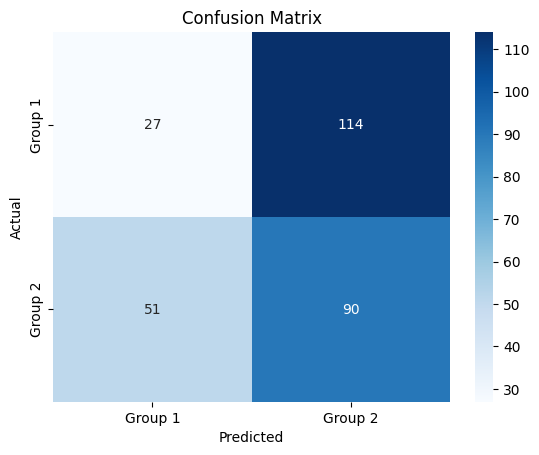

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and encode the 'prov_char' column
le_prov = LabelEncoder()
prov_char_encoded = le_prov.fit_transform(balanced_df['prov_char'])

# Define features and target for the balanced dataset
X_balanced = balanced_df.drop(columns=['dgp_name', 'dgp_name_encoded'])
y_balanced = balanced_df['dgp_name_encoded'].values

# Ensure X_balanced contains only numeric columns
X_balanced = X_balanced.select_dtypes(include=[np.number])

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Arrays to store results
accuracies = []
left_out_groups = []
all_y_test = []
all_y_pred = []

# Perform LOGO-CV
for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=prov_char_encoded):
    X_train, X_test = X_balanced.iloc[train_idx], X_balanced.iloc[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    accuracies.append(accuracy)
    left_out_groups.append(balanced_df['prov_char'].iloc[test_idx].unique())
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

# Display left out groups and their accuracies
for group, acc in zip(left_out_groups, accuracies):
    print(f'Left out group: {group}, Accuracy: {acc}')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
balanced_df.reset_index(drop=True, inplace=True)
balanced_df

,prov_char,country_char,wavenumber,11544,11540,11536,11532,11528,11524,11520,...,3960,3956,3952,tgp_name,dgp_name,fgp_name,country_name,thnoth_name,dgp_name_encoded,predictions
0,TRG,TH,TH-TRG-012-2312-002,0.318147,0.318102,0.318014,0.317915,0.317862,0.317850,0.317828,...,3.628265,3.598629,3.558260,Group 2,Group 1,Group 2,Thailand,Thai,0,0
1,TRG,TH,TH-TRG-012-2312-005,2.171516,2.176159,2.182422,2.182087,2.174141,2.165406,2.160244,...,4.594356,4.636004,4.677120,Group 2,Group 1,Group 2,Thailand,Thai,0,0
2,CCO,TH,TH-CCO-044-2311-002,0.154230,0.154150,0.154085,0.154081,0.154118,0.154182,0.154220,...,3.598184,3.574553,3.525827,Group 1,Group 1,Group 1,Thailand,Thai,0,0
3,TRG,TH,TH-TRG-012-2312-001,1.582778,1.581704,1.581005,1.580497,1.580264,1.581324,1.582647,...,4.226921,4.247781,4.246899,Group 2,Group 1,Group 2,Thailand,Thai,0,0
4,TRG,TH,TH-TRG-012-2312-004,0.143837,0.143761,0.143772,0.143796,0.143743,0.143678,0.143671,...,3.629822,3.599361,3.548111,Group 2,Group 1,Group 2,Thailand,Thai,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,CPN,TH,TH-CPN-006-2312-003,0.111142,0.111103,0.111104,0.111107,0.111115,0.111146,0.111176,...,3.480083,3.457863,3.431045,Group 2,Group 2,Group 2,Thailand,Thai,1,1
278,CPN,TH,TH-CPN-006-2312-004,-0.051029,-0.050869,-0.050686,-0.050568,-0.050477,-0.050359,-0.050250,...,3.673790,3.688381,3.660497,Group 2,Group 2,Group 2,Thailand,Thai,1,1
279,KBI,TH,TH-KBI-046-2311-001,0.507044,0.506976,0.506842,0.506670,0.506552,0.506504,0.506454,...,3.679572,3.645795,3.606953,Group 2,Group 2,Group 2,Thailand,Thai,1,1
280,SNI,TH,TH-SNI-012-2312-008,1.693304,1.692124,1.690717,1.690009,1.690967,1.692275,1.692195,...,4.260577,4.191142,4.135876,Group 2,Group 2,Group 3,Thailand,Thai,1,1


In [28]:
balanced_df.drop(columns=['dgp_name_encoded', 'predictions'], inplace=True)

C:\Users\pingk\AppData\Local\Temp\ipykernel_27120\3311909791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df.drop(columns=['dgp_name_encoded', 'predictions'], inplace=True)


In [ ]:
balanced_df

In [29]:
balanced_df

,prov_char,country_char,wavenumber,11544,11540,11536,11532,11528,11524,11520,...,3968,3964,3960,3956,3952,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,TRG,TH,TH-TRG-012-2312-002,0.318147,0.318102,0.318014,0.317915,0.317862,0.317850,0.317828,...,3.659960,3.647272,3.628265,3.598629,3.558260,Group 2,Group 1,Group 2,Thailand,Thai
1,TRG,TH,TH-TRG-012-2312-005,2.171516,2.176159,2.182422,2.182087,2.174141,2.165406,2.160244,...,4.747066,4.642889,4.594356,4.636004,4.677120,Group 2,Group 1,Group 2,Thailand,Thai
2,CCO,TH,TH-CCO-044-2311-002,0.154230,0.154150,0.154085,0.154081,0.154118,0.154182,0.154220,...,3.593228,3.596809,3.598184,3.574553,3.525827,Group 1,Group 1,Group 1,Thailand,Thai
3,TRG,TH,TH-TRG-012-2312-001,1.582778,1.581704,1.581005,1.580497,1.580264,1.581324,1.582647,...,4.242051,4.220577,4.226921,4.247781,4.246899,Group 2,Group 1,Group 2,Thailand,Thai
4,TRG,TH,TH-TRG-012-2312-004,0.143837,0.143761,0.143772,0.143796,0.143743,0.143678,0.143671,...,3.647367,3.637107,3.629822,3.599361,3.548111,Group 2,Group 1,Group 2,Thailand,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,CPN,TH,TH-CPN-006-2312-003,0.111142,0.111103,0.111104,0.111107,0.111115,0.111146,0.111176,...,3.495276,3.492689,3.480083,3.457863,3.431045,Group 2,Group 2,Group 2,Thailand,Thai
278,CPN,TH,TH-CPN-006-2312-004,-0.051029,-0.050869,-0.050686,-0.050568,-0.050477,-0.050359,-0.050250,...,3.662382,3.657384,3.673790,3.688381,3.660497,Group 2,Group 2,Group 2,Thailand,Thai
279,KBI,TH,TH-KBI-046-2311-001,0.507044,0.506976,0.506842,0.506670,0.506552,0.506504,0.506454,...,3.707816,3.705915,3.679572,3.645795,3.606953,Group 2,Group 2,Group 2,Thailand,Thai
280,SNI,TH,TH-SNI-012-2312-008,1.693304,1.692124,1.690717,1.690009,1.690967,1.692275,1.692195,...,4.183349,4.234162,4.260577,4.191142,4.135876,Group 2,Group 2,Group 3,Thailand,Thai


In [ ]:
# balanced_df.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4nwin_nm_blncd.csv", index=False)

In [30]:
# Rename the column 'wavenumber' to 'sample_code'
data_1 = balanced_df.rename(columns={'wavenumber': 'sample_code'})

In [31]:
data_1.drop(columns=['country_char'], inplace=True)

In [32]:
data_1['sample_code'] = data_1['sample_code'].str[:19]

In [33]:
data_1

,prov_char,sample_code,11544,11540,11536,11532,11528,11524,11520,11516,...,3968,3964,3960,3956,3952,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,TRG,TH-TRG-012-2312-002,0.318147,0.318102,0.318014,0.317915,0.317862,0.317850,0.317828,0.317772,...,3.659960,3.647272,3.628265,3.598629,3.558260,Group 2,Group 1,Group 2,Thailand,Thai
1,TRG,TH-TRG-012-2312-005,2.171516,2.176159,2.182422,2.182087,2.174141,2.165406,2.160244,2.158532,...,4.747066,4.642889,4.594356,4.636004,4.677120,Group 2,Group 1,Group 2,Thailand,Thai
2,CCO,TH-CCO-044-2311-002,0.154230,0.154150,0.154085,0.154081,0.154118,0.154182,0.154220,0.154206,...,3.593228,3.596809,3.598184,3.574553,3.525827,Group 1,Group 1,Group 1,Thailand,Thai
3,TRG,TH-TRG-012-2312-001,1.582778,1.581704,1.581005,1.580497,1.580264,1.581324,1.582647,1.583170,...,4.242051,4.220577,4.226921,4.247781,4.246899,Group 2,Group 1,Group 2,Thailand,Thai
4,TRG,TH-TRG-012-2312-004,0.143837,0.143761,0.143772,0.143796,0.143743,0.143678,0.143671,0.143703,...,3.647367,3.637107,3.629822,3.599361,3.548111,Group 2,Group 1,Group 2,Thailand,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,CPN,TH-CPN-006-2312-003,0.111142,0.111103,0.111104,0.111107,0.111115,0.111146,0.111176,0.111159,...,3.495276,3.492689,3.480083,3.457863,3.431045,Group 2,Group 2,Group 2,Thailand,Thai
278,CPN,TH-CPN-006-2312-004,-0.051029,-0.050869,-0.050686,-0.050568,-0.050477,-0.050359,-0.050250,-0.050165,...,3.662382,3.657384,3.673790,3.688381,3.660497,Group 2,Group 2,Group 2,Thailand,Thai
279,KBI,TH-KBI-046-2311-001,0.507044,0.506976,0.506842,0.506670,0.506552,0.506504,0.506454,0.506350,...,3.707816,3.705915,3.679572,3.645795,3.606953,Group 2,Group 2,Group 2,Thailand,Thai
280,SNI,TH-SNI-012-2312-008,1.693304,1.692124,1.690717,1.690009,1.690967,1.692275,1.692195,1.690995,...,4.183349,4.234162,4.260577,4.191142,4.135876,Group 2,Group 2,Group 3,Thailand,Thai


In [34]:
data_1.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\NIR_2G_clnd_blncd.csv", index=False)

In [ ]:
df_99 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\ffrt46_3a_clnd_blncd.csv")
df_99

the BEST
don't mess it up